In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

BUSINESS UNDERSTANDING

explain the reaoning/proposal

DATA UNDERSTANDING

#explain the data

???

LOADING & EDA ANALYSIS

DAILY

In [2]:
# Loading dataset
df= pd.read_excel('final.xlsx')
df.head()

,Date,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Interest rate
0,2003-09-12,NaN,NaN,714319.05,4.478129e+09,3.590024e+09,-7.966293e+07,2741964000,2.86,84.145,NaN
1,2004-09-12,NaN,28894.0,754184.14,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,84.320,NaN
2,2004-11-02,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,NaN
3,2004-11-03,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,NaN
4,2004-11-04,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.145,NaN


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           4808 non-null   datetime64[ns]
 1   12-Month Inflation(%)                          4765 non-null   float64       
 2   Total Remittances                              4807 non-null   float64       
 3   Total Debt                                     4315 non-null   float64       
 4   Imports                                        4808 non-null   float64       
 5   Exports                                        4808 non-null   float64       
 6   Foreign direct investment                      4808 non-null   float64       
 7   IBRD loans and IDA credits (DOD, current US$)  4808 non-null   int64         
 8   Unemployment Rate                              4808 non-nu

In [12]:
print(df.shape)

print('\nMissing values are as follows')
print(df.isnull().sum())

(4808, 11)

Missing values are as follows
Date                                               0
12-Month Inflation(%)                             43
Total Remittances                                  1
Total Debt                                       493
Imports                                            0
Exports                                            0
Foreign direct investment                          0
IBRD loans and IDA credits (DOD, current US$)      0
Unemployment Rate                                  0
exchange_rate                                      0
Interest rate                                    393
dtype: int64


Explain above

In [16]:
df.describe()

,Date,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Interest rate
count,4808,4808.000000,4807.000000,4.315000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4808.000000,4808.000000,4415.000000
mean,2014-06-03 19:31:02.895174912,7.578008,146869.071546,2.859218e+06,1.658182e+10,9.911720e+09,-4.223557e+08,5.404333e+09,3.593977,93.008117,9.139241
min,2003-09-12 00:00:00,1.850000,25473.000000,7.143191e+05,4.478129e+09,3.590024e+09,-1.364485e+09,2.663224e+09,2.650000,61.510000,5.750000
25%,2009-09-09 18:00:00,5.080000,53350.830000,9.935318e+05,1.252904e+10,8.138888e+09,-7.709787e+08,3.156096e+09,2.740000,78.082500,7.500000
50%,2014-06-18 12:00:00,6.450000,116064.370000,1.907036e+06,1.771164e+10,1.044871e+10,-3.526285e+08,4.199127e+09,2.770000,89.947500,8.750000
75%,2019-03-05 06:00:00,8.390000,221925.970000,4.483034e+06,2.027930e+10,1.147124e+10,-5.181906e+07,7.124964e+09,5.010000,103.270000,10.000000
max,2023-12-29 00:00:00,19.720000,378053.010000,8.206740e+06,2.460558e+10,1.395358e+10,3.871569e+08,1.246476e+10,5.810000,156.460000,18.000000
std,NaN,3.937267,103813.938541,2.201235e+06,4.853160e+09,2.226006e+09,4.936221e+08,2.991347e+09,1.230436,18.221024,2.398977


Handling missing values

We shall replace the data by mean, as the deviations are very low

In [17]:
df.columns

Index(['Date', '12-Month Inflation(%)', 'Total Remittances ', 'Total Debt',
       'Imports ', 'Exports ', 'Foreign direct investment',
       'IBRD loans and IDA credits (DOD, current US$)', 'Unemployment Rate',
       'exchange_rate', 'Interest rate'],
      dtype='object')

In [18]:
df['Total Remittances '] = df['Total Remittances '].fillna(df['Total Remittances '].mean())
df['Total Debt'] = df['Total Debt'].fillna(df['Total Debt'].mean())
df['Interest rate'] = df['Interest rate'].fillna(df['Interest rate'].mean())
df['12-Month Inflation(%)'] = df['12-Month Inflation(%)'].fillna(df['12-Month Inflation(%)'].mean())

In [19]:
df.isna().sum()

Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       0
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Interest rate                                    0
dtype: int64

## Visualization of the different features with Time

Inorder to visualize the data, we shall need to convert the date column to date time and use it as an index.

In [20]:
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

## 12-Month Inflation(%)

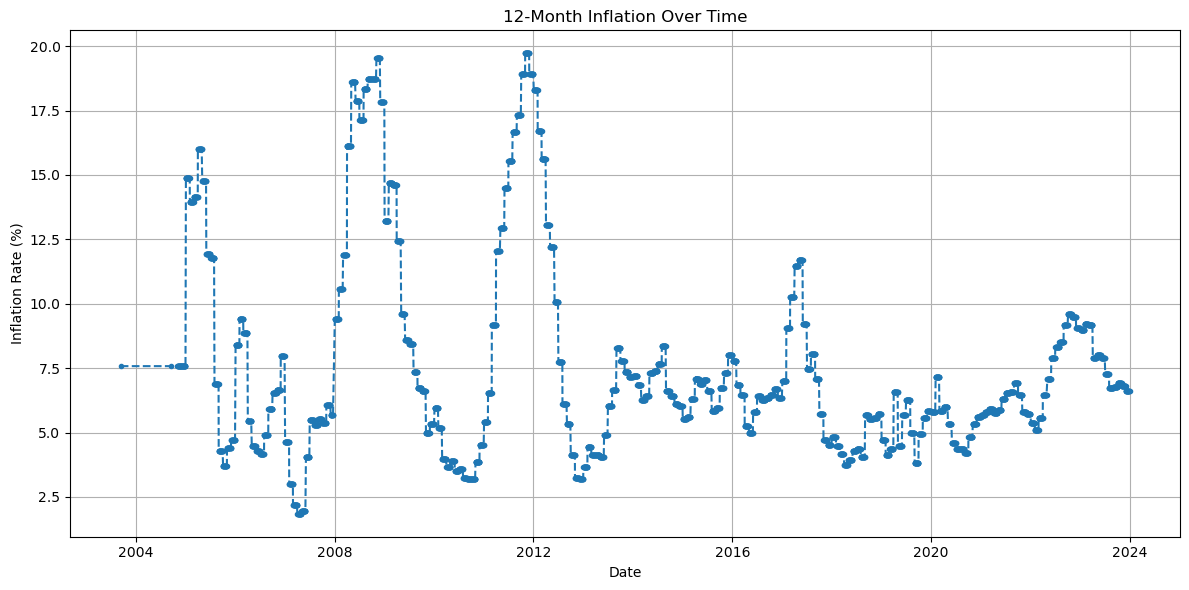

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['12-Month Inflation(%)'], marker='.', linestyle='--')
plt.title('12-Month Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6500\646139072.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['12-Month Inflation(%)'].resample('M').first()


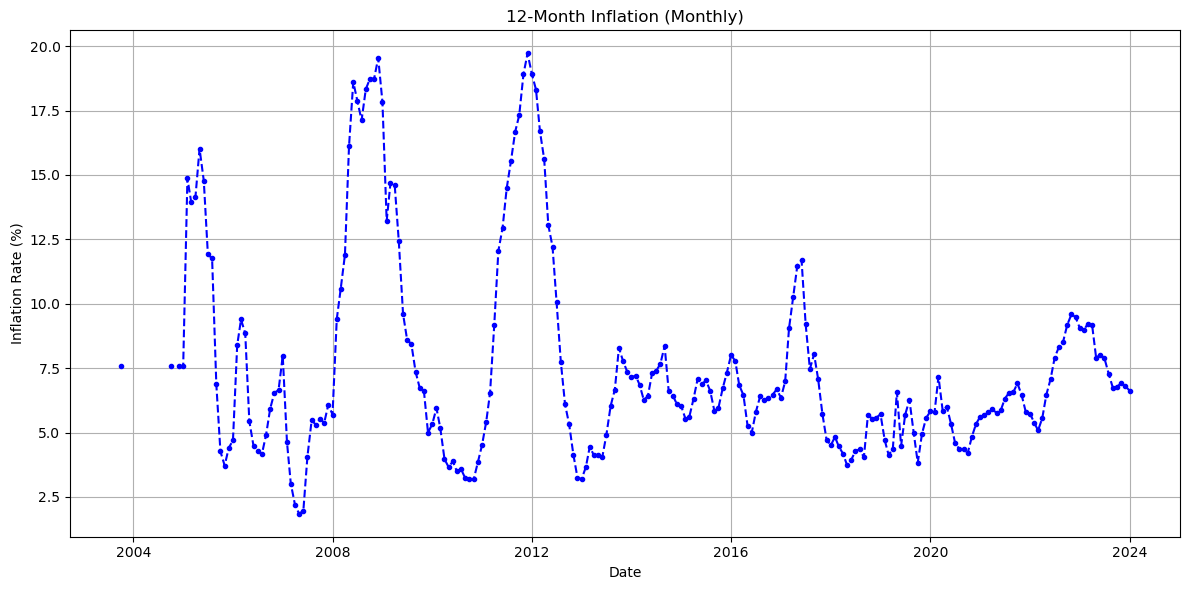

In [31]:
# Resample the data to monthly frequency and pick the first value for each month
monthly_data = df['12-Month Inflation(%)'].resample('M').first()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data, marker='.', linestyle='--', color='blue')
plt.title('12-Month Inflation (Monthly)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

We'll plot monthly, quarterly and yearly(combined)

## Import and Export

We plotted the two variables together due to their close relation.

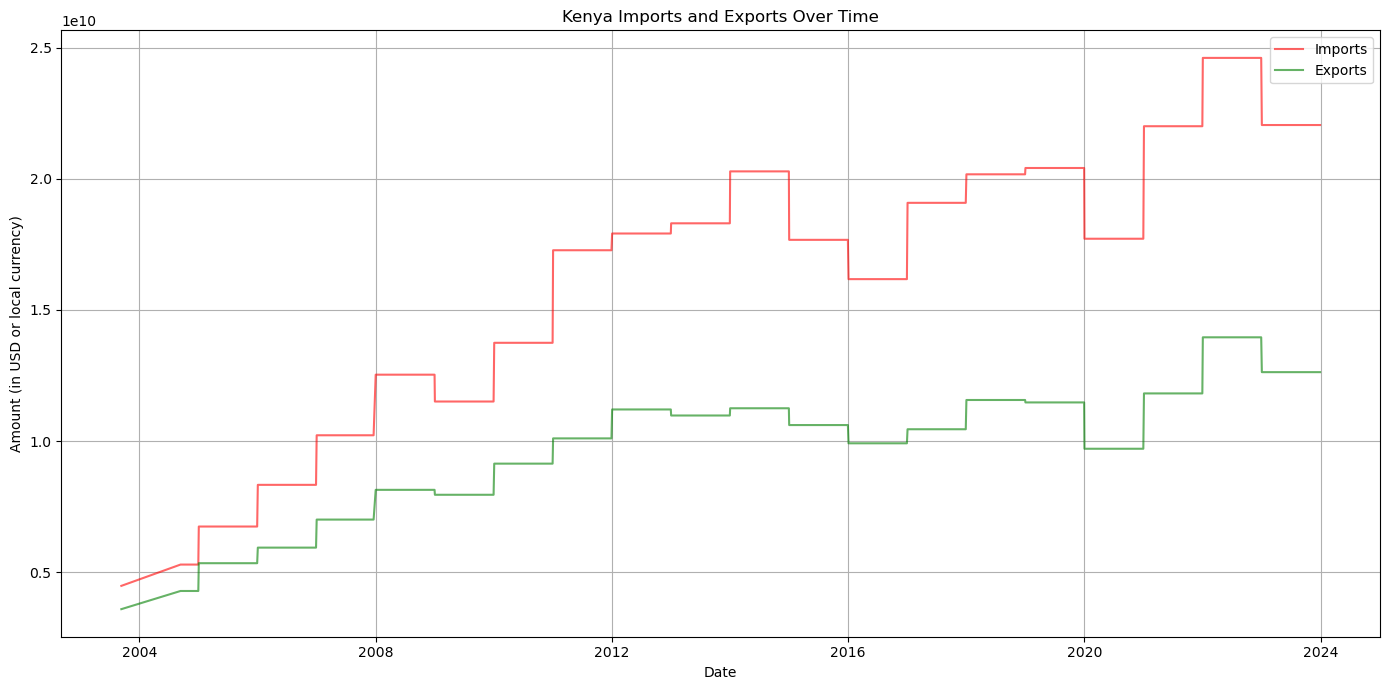

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Imports '], color='red', label='Imports', alpha=0.6)
plt.plot(df.index, df['Exports '], color='green', label='Exports', alpha=0.6)
plt.title('Kenya Imports and Exports Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (in USD or local currency)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MONTHLY

QUARTERLY

YEARLY

MODELLING